<a href="https://colab.research.google.com/github/malik214-rgb/Turf-Analysis_Statistika-Multivariat/blob/main/Arjuananta_Malik_Remed_Statmul_Analisis_TURF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arjuananta Malik

11220940000033

Tugas ini saya buat dengan dataset yang saya generate random dan kasus yang disesuaikan dengan dataset yang dibuat

## Permasalahan
Dalam pengelolaan usaha minuman di lingkungan kantin kampus, muncul permasalahan terkait penentuan produk yang perlu menjadi prioritas dalam penyediaan stok mingguan. Mengingat adanya beragam pilihan minuman serta keterbatasan modal yang dimiliki, diperlukan suatu strategi yang efektif untuk memilih kombinasi produk yang paling diminati oleh konsumen. Permasalahan utama terletak pada bagaimana menentukan 3-5 jenis minuman yang mampu menjangkau sebanyak mungkin pelanggan unik, dengan merujuk pada data transaksi pembelian selama satu minggu. Pemilihan kombinasi yang tidak tepat berisiko menimbulkan ketidakefisienan dalam pengelolaan stok serta berpotensi menurunkan tingkat penjualan.


## Metode
- Metode: TURF Analysis (Total Unduplicated Reach an Frequency)

- Tujuan: Untuk mengidentifikasi kombinasi produk yang mampu menjangkau pelanggan unik terbanyak dalam jumlah item yang terbatas

- Alasan memakai metode ini: Analisis ini cocok digunakan untuk menghitung jumlah kombinasi dari berbagai produk dengan melihat peluang yang memenuhi reach (target)

## Asumsi
- Tidak mempertimbangkan urutan konsumsi: Hanya melihat apakah minuman dikonumsi atau tidak
- Setiap pelanggan memiliki bobot yang sama: Tidak ada preferensi khusus, semua pelanggan dianggap setara

## Generate Data Random

In [ ]:
import pandas as pd
import numpy as np

# Daftar minuman
drinks = [
    'Teh', 'Kopi', 'Susu', 'Jus', 'Soda',
    'Coklat', 'Matcha', 'LemonTea', 'Mineral', 'Milkshake',
    'GreenTea', 'Latte', 'ThaiTea', 'Smoothie', 'Yoghurt'
]

# Jumlah mahasiswa
num_students = 500

# Seed untuk hasil yang konsisten
np.random.seed(42)

# Buat dictionary data
data = {
    'Mahasiswa': [f'M{i+1}' for i in range(num_students)],
}

# Generate nilai 0/1 untuk setiap minuman
for drink in drinks:
    data[drink] = np.random.binomial(1, 0.5, num_students)

# Daftar tipe pembayaran
payment_types = ['cash', 'qris', 'kasbon']

# Generate tipe pembayaran secara acak untuk setiap mahasiswa
data['Tipe Pembayaran'] = np.random.choice(payment_types, num_students)

# Buat DataFrame
df = pd.DataFrame(data)

# Susun ulang kolom supaya 'Tipe Pembayaran' ada di posisi kedua
cols = df.columns.tolist()
cols.insert(1, cols.pop(cols.index('Tipe Pembayaran')))
df = df[cols]

# Simpan ke CSV
df.to_csv('dataset_minuman.csv', index=False)

# Tampilkan 5 baris awal
df.head()


,Mahasiswa,Tipe Pembayaran,Teh,Kopi,Susu,Jus,Soda,Coklat,Matcha,LemonTea,Mineral,Milkshake,GreenTea,Latte,ThaiTea,Smoothie,Yoghurt
0,M1,qris,0,1,0,1,0,1,1,0,1,1,0,1,1,0,0
1,M2,cash,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0
2,M3,cash,1,0,1,0,1,1,0,1,1,0,1,0,1,0,1
3,M4,cash,1,1,1,0,0,1,1,0,0,0,0,0,1,0,1
4,M5,cash,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0


Jika hanya diperbolehkan menyetok 3 hingga 5 jenis minuman, kombinasi produk mana yang mampu menjangkau pelanggan terbanyak? Selain itu, bagaimana hasilnya jika analisis dilakukan berdasarkan beberapa tipe pembayaran?

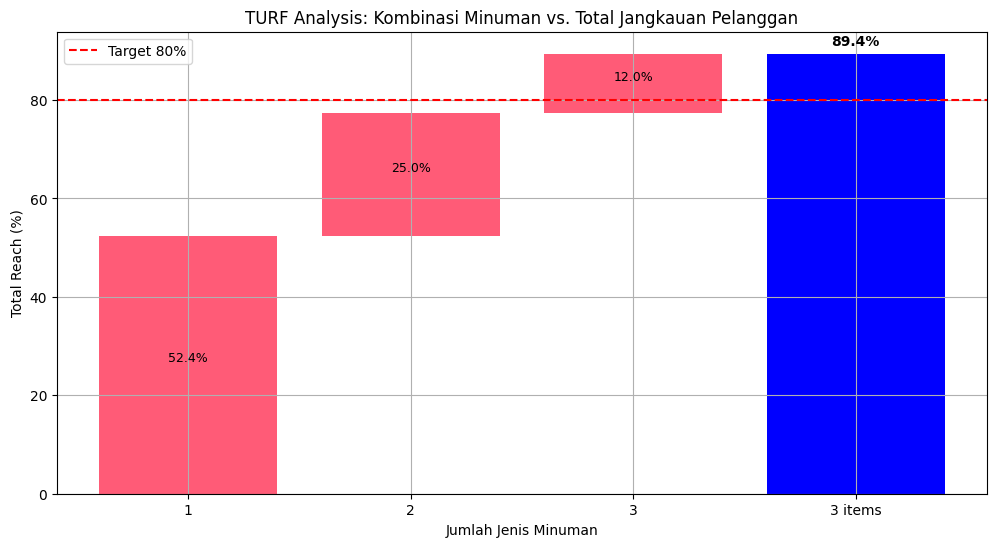

Untuk mencapai minimal 80%, perlu 3 Jenis Minuman.

 jensi minuman agar mencapai target : ['Susu', 'Matcha', 'Teh']


In [ ]:
import matplotlib.pyplot as plt

# @title Reach vs. Jumlah Jenis Minuman
data_used = df #@param {type:"string"}
Metode_Pembayaran = 'All' # @param ["All", "qris", "cash", "kasbon"]
Target_dalam_persen = 80 # @param

if Metode_Pembayaran != 'All':
  data_used = data_used[data_used['Tipe Pembayaran']==Metode_Pembayaran] #Filter kendaraan

if len(data_used)==0:
    raise SystemExit("Data kosong! Program dihentikan.")

target_reach_pct = Target_dalam_persen/100
target_reach = int(target_reach_pct * len(data_used))


index_ = data_used.columns.get_loc("Teh")   #nomor kolom data
reach_per_item = data_used[data_used.keys()[(index_):]].sum(axis=0).sort_values(ascending=False)   #hitung frekuensi lalu sorting dari yang terbesar

#Algoritma Greedy untuk menemukan kombinasi optimal
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:    #hitung reach
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])  # Tambah reach baru
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))  # Simpan progres reach

    if len(new_reach) >= target_reach:
        break  # Selesai jika sudah mencapai target

    current_reach = new_reach  # Perbarui reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]


# Bar chart bertingkat
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar("{}".format(i+1), inc * 100, bottom=bottoms, color="#ff5b77")
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100
plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')


# Bar terakhir (semua item, misal 50)
total_reach = len(set(data_used.index[data_used[selected_items[-1]] == 1])) / len(data_used)
plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="blue")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

#Label
plt.xlabel("Jumlah Jenis Minuman")
plt.ylabel("Total Reach (%)")
plt.title("TURF Analysis: Kombinasi Minuman vs. Total Jangkauan Pelanggan")
plt.legend()
plt.grid(True)
plt.savefig('reach_vs_minuman.png')
plt.show()

#Output hasil
max_reach = max(reach_progress)  # Ubah ke persen

if max_reach>=target_reach_pct:
  print(f"Untuk mencapai minimal {target_reach_pct*100:.0f}%, perlu {len(selected_items)} Jenis Minuman.")
else:
  print(f"Tidak dapat mencapai {target_reach_pct*100:.0f}%.")
  print(f"maksimal hanya {max_reach*100:.0f}%, dengan {len(selected_items)} OOH")

print("\n jensi minuman agar mencapai target :", selected_items[:len(selected_items)])  # Menampilkan lokasi iklan agar optimal


## Intepretasi
- Untuk semua pembayaran, diperlukan 3 jenis minuman (Susu, Matcha, Teh) agar mencapai target jangkauan minimal 80%.

- Untuk pembayaran cash, diperlukan 3 jenis minuman (Susu, Coklat, Latte) agar mencapai target jangkauan minimal 80%.

- Untuk pembayaran QRIS, diperlukan 2 jenis minuman (Jus, Susu) agar mencapai target jangkauan minimal 80%.

- Untuk pembayaran kasbon, diperlukan 2 jenis minuman (Teh, Matcha) agar mencapai target jangkauan minimal 80%.